Who knows how this will go? Certainly not me!<br>
Resources and references:<br>
https://www.youtube.com/watch?v=SmWbKiueYVU<br>
https://github.com/rohan-paul/LLM-FineTuning-Large-Language-Models/blob/main/Other-Language_Models_BERT_related/Topic_Modeling_with_BERT_and_Automatic_cluster_labeling/Topic_Modeling.ipynb

Hey past Ace! It's future Ace! Things were going pretty well when we got to this point. At least until you, in a rush put the MLFlow code AND the checkpoint code in DataBricks, then accidentally deleting the experiment, thereby deleting the very notebook you were editing in. I'm at least 20 minutes into sitting down at my laptop procrastinating starting the re-write, and that was after at least half an hour of washing dishes. Lesson learned, always write in VSCode and don't copy until you've comitted it and pushed it.

In [ ]:
# In case you need it

# %pip install transformers
# %pip install torch
%pip install mlflow

In [26]:
# Ok so uh... how load data?
# Let's start with loading in libraries

import pandas as pd
from transformers import BertTokenizer
import random as rn
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# Idk what else we need?
# I'll figure it out as I go at least

# We'll go ahead and grab what we need for the word clouds. 
# Just because they're cool
# from nltk.corpus import stopwords
from wordcloud import WordCloud

# This is for data cleaning
# We didn't need either of these
import re
# import xml

# We did actually need re

# Ok now data? Or do I just pull that directly into a dataframe?
# That is correct, we pull it into a dataframe.

Ok so we have our imports (for now) so now we'll go ahead and set up some basic data frames, then append the app name to the description. Well, ok first we'll figure out which part of the descriptions to keep. I think we just keep the detailed description out of the set.

In [27]:
df_steam_base = pd.read_csv('./Data/steam.csv')
# df_steam_base

In [28]:
df_steam_desc = pd.read_csv('./Data/steam_description_data.csv')


In [29]:
merged_df = pd.merge(left=df_steam_desc, right=df_steam_base, left_on='steam_appid', right_on='appid')


In [ ]:
working_data = merged_df[['steam_appid', 'name', 'detailed_description',
                          'developer', 'publisher', 'categories',
                          'genres', 'price']]
working_data.to_csv('./Data/workingdata.csv')
# working_data.shape

,steam_appid,name,detailed_description,developer,publisher,categories,genres,price
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,7.19
1,20,Team Fortress Classic,One of the most popular online action games of...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,3.99
2,30,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,Valve,Valve,Multi-player;Valve Anti-Cheat enabled,Action,3.99
3,40,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,Action,3.99
4,50,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,Gearbox Software,Valve,Single-player;Multi-player;Valve Anti-Cheat en...,Action,3.99
...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,"<img src=""https://steamcdn-a.akamaihd.net/stea...",SHEN JIAWEI,SHEN JIAWEI,Single-player;Steam Achievements,Adventure;Casual;Indie,2.09
27071,1065570,Cyber Gun,Have you ever been so lonely that no one but y...,Semyon Maximov,BekkerDev Studio,Single-player,Action;Adventure;Indie,1.69
27072,1065650,Super Star Blast,<strong>Super Star Blast </strong>is a space b...,EntwicklerX,EntwicklerX,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,3.99
27073,1066700,New Yankee 7: Deer Hunters,Pursue a snow-white deer through an enchanted ...,Yustas Game Studio,Alawar Entertainment,Single-player;Steam Cloud,Adventure;Casual;Indie,5.19


In [ ]:
# Tbh I'm just going to make a general word cloud just because

txt = ' '.join(desc for desc in working_data.detailed_description)

plt.figure(figsize=(15, 8))

wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100,
    width=1000,
    height=700
).generate(txt)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

<b><font size="10">This is where the cleaning happnes</font></b>

In [ ]:
# So we made the function now we need to run it through the text?
# Yeeeeaaaahhhhhh
# !!this is where we clean stuff

# df_clean = working_data.copy()
# df_clean['description'] = df_clean['detailed_description']
# df_clean['description'] = df_clean['description'].apply(remove_tags)

# df_clean['description']
# df_clean.to_csv('./Data/justtakingalook.csv')

def unify_whitespaces(text):
    cleaned_string = re.sub(' +', ' ', text)
    return cleaned_string

def other_cleaning(text):
    result = re.sub(r"\s+",' ', text)
    result = re.sub(r'\d+', '', result)
    return result.strip()

# Let's try something else
# https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas
working_data['detailed_description'] = working_data['detailed_description'].str.replace(r'<[^<>]*>', '', regex=True)
# working_data['detailed_description']

working_data['detailed_description'] = working_data['detailed_description'].apply(unify_whitespaces)
working_data['detailed_description']

working_data['detailed_description'] = working_data['detailed_description'].apply(other_cleaning)
working_data['detailed_description'] = working_data['detailed_description'].str.lower()


working_data['detailed_description'].to_csv('./Data/justtakingalook.csv')


<b><font size="10">One-hot encoding genres</font></b>

In [ ]:
working_data['genres']

# DeepSeek gave me permission to explode things
# https://chat.deepseek.com/a/chat/s/dbfcda76-a165-49ad-a23f-fc2edb9f1da9

working_data['genres'] = working_data['genres'].str.split(';')
df_working_data_generes_exploded = working_data.explode('genres')

df_working_data_generes_exploded

Proof of DeepSeek letting me explode things

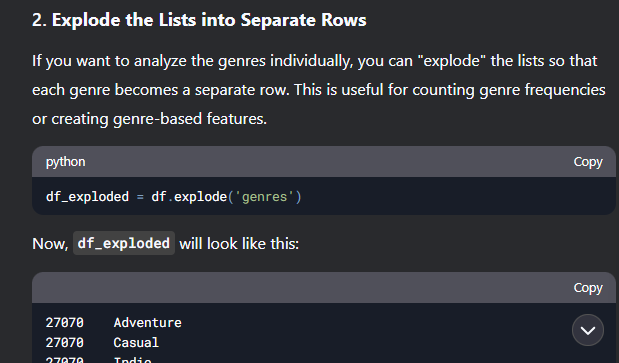

In [ ]:
# I'll admit DeepSeek gave me more than I was intending on using,
# But it'd be a waste of resources not to use it.

df_genres_one_hot = working_data['genres'].str.join(
    '|').str.get_dummies()

df_genres_one_hot

In [ ]:
print(len(working_data['detailed_description']))

<b><font size="10">tokenizing and embedding</font></b><br>
Ok so<br>
It looks like this is where the tutorial stops being useful<br>
Because I don't see it using BERT anywhere<br>

So this is where this query from DeepSeek started being used<br>
I didn't actually ask for this info specifically.<br>
(insert or imagine screenshots here)


In [25]:
# %pip install mlflow

import mlflow
import os

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
# import mlflow

# mlflow.set_tracking_uri("http://<172.26.240.232>:5000")

# mlflow.set_experiment("steam games similarity comparison")

with mlflow.start_run():

    mlflow.log_param("batch_size", 8)
    mlflow.log_param("model_name", "bert-base-uncased")
    mlflow.log_param("max_length", 512)

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained ('bert-base-uncased')

    # I have found out the words that I'm looking for is Similarity Analysis
    # I must admit this is where I got a lot of help from DeepSeek.
    def tokenize_desc(descriptions, max_length=512):
        # descriptions - Pandas Series
        return tokenizer(
            descriptions.tolist(),
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='pt' #This apparantly returns pytorch tensors
            # I'm not sure how that works
        )

    # tokenized_descriptions = tokenize_desc(working_data['detailed_description'])

    model = BertModel.from_pretrained('bert-base-uncased')

    def generate_embeddings_batched(
            tokenizer, model, descriptions, batch_size=8, check_dir="checkpoints"):
        os.makedirs(check_dir, exist_ok=True)
        all_embeddings = []
        total_batches = len(descriptions) // batch_size + (1 if len(descriptions) % batch_size != 0 else 0)
        
        for i in range(0, len(descriptions), batch_size):
            batch_descriptions = descriptions[i:i + batch_size]
            tokenized_batch = tokenize_desc(batch_descriptions)

            if i % (10 * batch_size) == 0:
                print(f"Processing batch {i // batch_size +1} of {total_batches}")

            with torch.no_grad():
                outputs = model(**tokenized_batch)
                embeddings = outputs.last_hidden_state

                # This is where that mean pooling takes place
                # But I do it again later
                # But that was a previous version of the code
                # So idk what's going on.
                attention_mask = tokenized_batch['attention_mask']
                input_mask_expanded = attention_mask.unsqueeze(
                    -1).expand(embeddings.size()).float()
                sum_embeddings = torch.sum(embeddings * input_mask_expanded, 1)
                sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)

                batch_embeddigns = sum_embeddings / sum_mask

                all_embeddings.append(batch_embeddigns)

            if (i // batch_size) % 10 == 0:
                checkpoint_path = os.path.join(check_dir, f"checkpoint_batch_{i // batch_size}.pt")
                torch.save(torch.cat(all_embeddings, dim=0), checkpoint_path)

                print(f"checkpoint saved at {checkpoint_path}")


        return torch.cat(all_embeddings, dim=0)

    batch_size = 8
    embeddings = generate_embeddings_batched(
        tokenizer, model, working_data['detailed_description'], batch_size
    )

    mlflow.log_metric(
        "num_descriptions_processed", 
        len(working_data['detailed_description'])
    )
    
    embeddings_file = "embeddings.pt"
    torch.save(embeddings, embeddings_file)
    mlflow.log_artifact(embeddings_file)

    mlflow.pytorch.log_model(model, "bert-model")




In [ ]:
# I'm still a bit confused, 
# I'm not sure how we're getting the cross reference of game IDs with this
# I understand that this basically takes all the stuff in a description
# and smashes it into one embedding?
# But how does it know which game is which???
# I didn't pass in the game ID when I gave BERT the descriptions

# Ok so uh. I had updated the code earlier to do mean pooling without realizing it
# This is what I get for using AI
# At least I know what mean pooling is though, 
# I'm still confused about the things stated earlier.

# Well ok wait
# Because I was doing mean_pooling when I updated the embedder to run with batches
# So maybe I *do* still need this?
# Idk man I'm just doing my best here at this point.

def mean_pooling(embeddings, attention_mask):
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(
        embeddings.size()).float()

    sum_embeddings = torch.sum(embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    return sum_embeddings / sum_mask

attention_mask = embeddings['attention_mask']

description_embeddings = mean_pooling(embeddings, attention_mask)

cls_embeddings = embeddings[:, 0, :]

In [ ]:
# This is apparantly where we find similar games.
# Again, I have NOT given BERT the info of which desc is for which game
# So I'm just gonna have to jump in and see if it works I guess.

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

description_embeddings = embeddings.numpy()

similarity_matrix = cosine_similarity(embeddings)

similar_games_indices = np.argsort(similarity_matrix[0])[::-1]

similar_games_indices = similar_games_indices[1:6]

print(working_data.iloc[similar_games_indices]['detailed_description'])

In [ ]:
np.save('./Data/description_embeddings.npy', description_embeddings)